## Prueba 1 - Machine Learning
* Nombre: Pablo Bustamante - Melissa Neira
* Profesor: Gabriel Tamayo
* Generación: G12

----
### Sesión Presencial 4

Al final de la sesión, el alumno (o pareja) debe presentar una primera iteración de la Modelación Elementos comunes a considerar en éste hito:
* Las grillas de hiperparámetros para cada uno de los cinco modelos propuestos deben estar declaradas. (3 puntos)
* Generar la búsqueda de grilla de por lo menos dos modelos, preservando la información en un archivo serializado. (2 puntos)
    * Específicos prueba 1:
    * La prueba 1 no contiene específicos.
* Específicos prueba 2:
    * Se debe presentar una solución a alguno de los siguientes puntos:
    * Modelación de la predicción de arrestos.
    * Modelación de la predicción de evento violento.
----

### Un análisis exploratorio

En el siguiente apartado harémos la importación del dataframe utilizando la libreria pandas y posteriormente analizaremos sus features para identificar que tipo de dato contiene.


Además se identificarán los valores perdidos que tenga y si es necesario elimiarlos o recodificar u 
reestructurar parte de la data.


Luego se hará una breve revisión de sus comportamientos univa y multi variados para identificar futuras 
normalizaciones, regularizaciones, escalamientos, etc. (preprocesamiento en general).


In [1]:
#Manipulacion de datos
import pandas as pd
import numpy as np

#Graficacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgn

#Preprocesamiento de data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split
import spacy


#Extras para experiencia de usuario
import warnings
warnings.filterwarnings('ignore')

**Se debe analizar el comportamiento del vector objetivo. (2 puntos)**

### Análisis exploratorio

In [2]:
df = pd.read_csv('training_tweets.csv').drop(columns='Unnamed: 0')
dfm2 = pd.read_csv('training_tweets.csv').drop(columns='Unnamed: 0')
df.head()

content  sentiment
0                    Happy Mama's day to all mothers       love
1  @LysdelTellez I am lost. Please help me find a...      worry
2  @BoomKatt yes yes I AM, networking whore to th...  happiness
3  you@snapplynn Wish that would have been your t...    neutral
4  now i am doing the MicroEconomics project  iha...      worry

Podemos apreciar que el dataframe contiene comentarios de twitter en inglés clasificados por sentimiento

In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    30000 non-null  object
 1   sentiment  30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


Se puede apreciar que las columnas no deben llevar valores nulos por lo que todas las columnas tienen data

In [4]:
print(f'Filas: {df.shape[0]}\nColumnas: {df.shape[1]}')

Filas: 30000
Columnas: 2


Podemos apreciar que tenemos 30000 registros y 2 columnas para trabajar

In [5]:
df['sentiment'].value_counts('%')

neutral       0.215033
worry         0.211233
happiness     0.131733
sadness       0.128967
love          0.096933
surprise      0.053967
fun           0.044367
relief        0.038600
hate          0.032500
empty         0.020567
enthusiasm    0.018633
boredom       0.004500
anger         0.002967
Name: sentiment, dtype: float64

Podemos apreciar en nuestro vector objetivo que tenemos 13 sentimientos de los cuales uno corresponde al sentimiento neutral, el cual no nos sirve para predecir si es positivo o negativo el comentario por lo que a posteriori se procedereá a eliminar esos registros

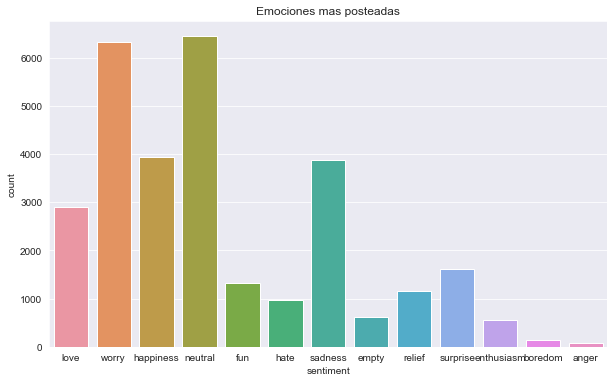

In [6]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Emociones mas posteadas')
sns.countplot(df['sentiment']);

Aqui podemos apreciar la distribución de los sentimientos de una manera más visual, donde identificamos que se van a borrar el 21% de los registros los cuales corresponden a sentimientos neutrales

In [7]:
def freq_words(df, sentimiento, var='content',defstop=1):
    ''' Función que recibe un df y entrega las 100 palabras con mayor frecuencia '''
    #declaraciones
    df_genero = df[df['sentiment']==sentimiento]
    
    # instanciamos un objeto 
    if defstop == 1:
        count_vectorizer=CountVectorizer(stop_words='english')
    else:
        count_vectorizer=CountVectorizer(stop_words=my_stop_words,preprocessor = myfuncion)

    # Implementamos los pasos fit y transform 
    count_vectorizer_fit = count_vectorizer.fit_transform(df_genero[var])

    # Extraemos tokens (palabras) 
    words = count_vectorizer.get_feature_names() 

    # extraemos frecuencia 
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)

    # creamos un df nuevo
    df_words_freq = pd.DataFrame(data = words_freq, index = words, columns = ['cantidad'])
    return df_words_freq.sort_values(by = 'cantidad', ascending = False).head(40)

In [8]:
# instanciamos un objeto 
count_vectorizer=CountVectorizer(stop_words='english') 

# Implementamos los pasos fit y transform 
count_vectorizer_fit = count_vectorizer.fit_transform(df['content']) 

# Extraemos tokens (palabras) 
words = count_vectorizer.get_feature_names() 

# extraemos frecuencia 
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

In [9]:
df_words_freq = pd.DataFrame(data = words_freq, index = words, columns = ['cantidad'])
df_words_freq = df_words_freq.sort_values(by = 'cantidad', ascending = False).head(100)

Análizando la frecuencia de palabras que más se repiten entre todos los comentarios obtenemos el siguiente top

In [10]:
df_words_freq.head(10)

cantidad
day        2403
just       2369
good       1736
like       1444
quot       1399
http       1398
today      1269
love       1245
work       1240
got        1236

Nos apoyaremos en la siguiente función para hacer un análisis de las palabras mas comentadas por cada sentimiento

In [11]:
for sentiment in df['sentiment'].unique():
    print(f'el top 10 de palabras mas comentadas para el sentimiento {sentiment} es el siguiente')
    print(freq_words(df,sentiment).head(10))
    print('\n')

el top 10 de palabras mas comentadas para el sentimiento love es el siguiente
         cantidad
love          665
day           592
happy         452
good          243
mothers       223
mother        223
just          208
http          179
quot          173
thanks        151


el top 10 de palabras mas comentadas para el sentimiento worry es el siguiente
       cantidad
just        521
like        344
day         317
don         313
got         304
today       292
good        291
work        290
going       276
know        272


el top 10 de palabras mas comentadas para el sentimiento happiness es el siguiente
        cantidad
day          492
good         428
just         324
happy        321
thanks       228
great        223
lol          223
quot         214
http         207
today        191


el top 10 de palabras mas comentadas para el sentimiento neutral es el siguiente
       cantidad
just        436
http        413
day         321
com         311
quot        296
work        265


Comentario: Al análizar el vector objetivo y su comportamiento nos damos cuenta de varias observaciones.

Una de ellas es que el sentimiento neutral no nos sirve para discriminar o clasificar si un comentario es positivo o negativo. Por lo que se optará por no utilizarlo en nuestr entrenamiento, perdiendo así un 21% de los registros.

Otra observación es que al realizar el conteo de palabras se repiten estas varias veces por lo que se optará por cambiar todos los comentarios a letras minusculas.

Vamos a eliminar de los comentarios las menciones a otros usuarios, por ejemplo tenemos este comentario:
@koerox eres un cabronazi, al eliminar la mención el comentario quedaría así: "eres un cabronazi".

Por ultimo nos encontramnos frente a varios stopwords o palabras muy repetidas que alteran este conteo de frecuencias por lo que incluiremos algunas de las que esten contenidas en el top 100 de todos los comentarios como por ejemplo http, twitter, com, etc.

---
### Preprocesamiento

Eliminaremos las menciones a usuarios de las oraciones de los comentarios

In [12]:
df['content'] = df['content'].apply(lambda x: ' '.join([y for y in x.split() if '@' not in y]))

A continuación se procede a reemplazar las mayusculas de los comentarios por minusculas para no alterar la frecuencia de plabras tratandolas como distintas palabras.

In [13]:
##transformaciones
df['content']=df['content'].str.lower()


Ahora vamos a reemplazar por valores no numericos o nulos los sentimientos que sean neutral, con el objetivo de graficar con la libreria msgn el comportamiento de esta decisión  

In [14]:
df['sentiment']=np.where(df['sentiment']=='neutral',np.nan,df['sentiment'])

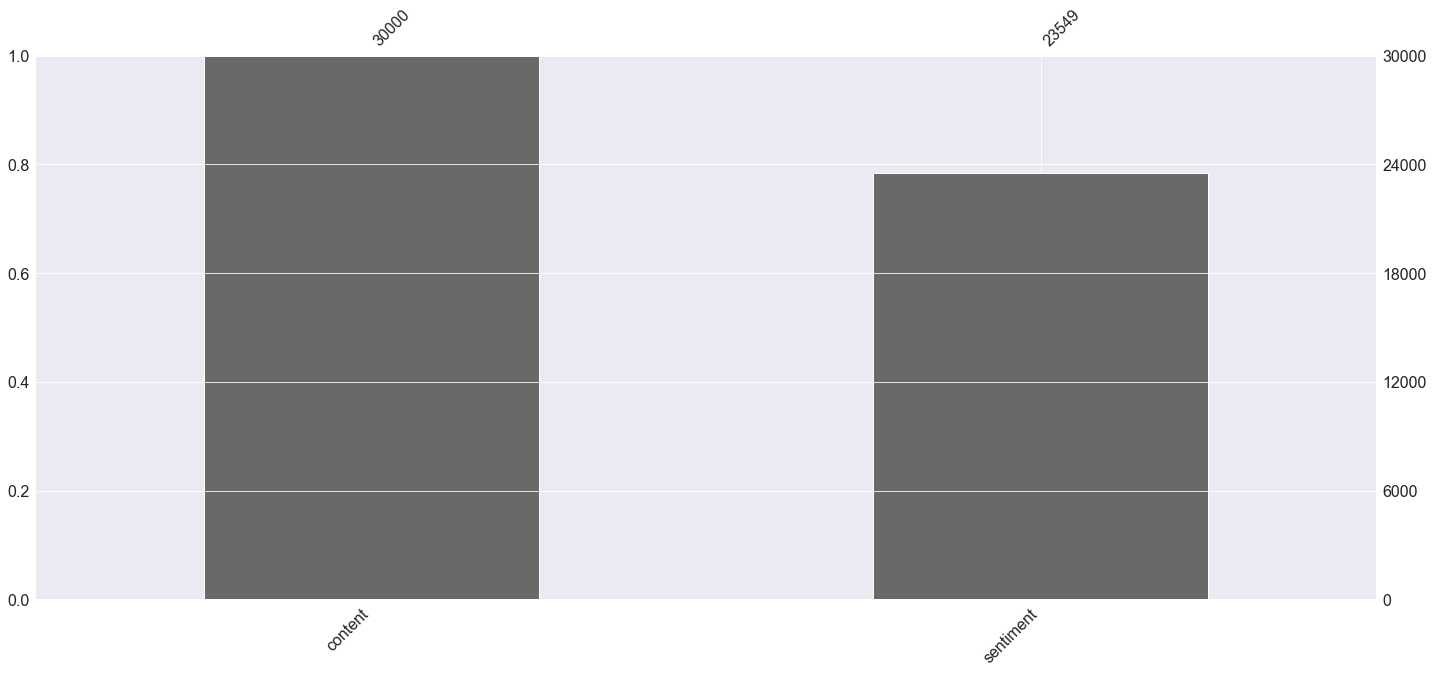

In [15]:
##visualizacion de datos
msgn.bar(df);

Podemos observar cuantos registros estamos perdiendo, reitero que como se mencionó anteriormente corresponde al 21%

Aqui podemos observar otra perspectiva de los datos perdidos:

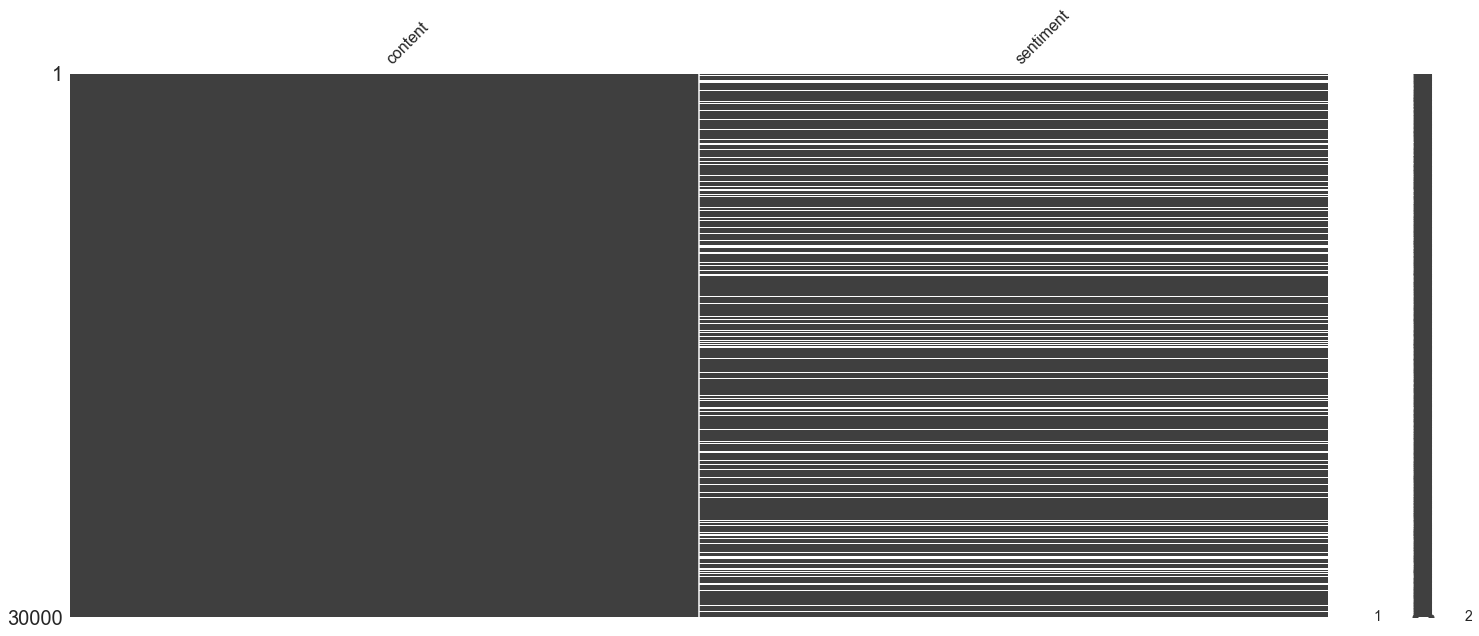

In [16]:
msgn.matrix(df);

In [17]:
df= df.dropna().reset_index().drop(columns='index')

Se procederá a incorporar nuestras propias stopwords con el objetivo de eliminar palabras que se repiten mucho y no tengan gran importancia en lo que buscamos predecir

In [18]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['twitter','amp','com','http','quot','twitpic'])

def myfuncion(x):
    words = x.split(" ")
    words_final = []
    for w in words:
        if len(w)>4:
            words_final.append(w)
    return " ".join(words_final)

Una vez agregadas las stopwords procedemos a evaluar nuestro nuevo ranking de palabras

In [19]:
# instanciamos un objeto 
count_vectorizer=CountVectorizer(stop_words=my_stop_words,preprocessor = myfuncion) 

# Implementamos los pasos fit y transform 
count_vectorizer_fit = count_vectorizer.fit_transform(df['content']) 

# Extraemos tokens (palabras) 
words = count_vectorizer.get_feature_names() 

# extraemos frecuencia 
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

In [20]:
df_words_freq = pd.DataFrame(data = words_freq, index = words, columns = ['cantidad'])
df_words_freq = df_words_freq.sort_values(by = 'cantidad', ascending = False).head(100)

Este es el ranking de todos los comentarios.

In [21]:
df_words_freq.head(20)

cantidad
today         1049
happy         1049
going          933
really         856
don            771
night          685
think          664
thanks         631
great          594
morning        516
sorry          477
tomorrow       444
mother         442
tonight        406
gonna          402
better         400
right          396
mothers        386
weekend        373
sleep          372

Para cada sentimiento individual, estos son los rankings:

In [22]:
for sentiment in df['sentiment'].unique():
    print(f'el top 10 de palabras mas comentadas para el sentimiento {sentiment} es el siguiente')
    print(freq_words(df,sentiment,'content',2).head(10))
    print('\n')

el top 10 de palabras mas comentadas para el sentimiento love es el siguiente
         cantidad
happy         452
mothers       223
mother        223
thanks        151
great         120
really        110
lt            103
today         101
thank          81
night          79


el top 10 de palabras mas comentadas para el sentimiento worry es el siguiente
          cantidad
don            308
today          292
going          276
think          254
really         233
sorry          233
night          175
sleep          135
gonna          130
tomorrow       129


el top 10 de palabras mas comentadas para el sentimiento happiness es el siguiente
         cantidad
happy         321
thanks        228
great         223
today         191
morning       171
night         155
going         147
really        122
awesome       118
mother        108


el top 10 de palabras mas comentadas para el sentimiento fun es el siguiente
          cantidad
going           61
night           55
today          

Comentarios: Podemos observar que la data ya está bastante más limpia y se puede comenzar a diferenciar mejor las palabras mas utilizadas por cada sentimiento.

---

### Preparación de matrizes y entrenamiento del vector objetivo

Para comenzar vamos a obtener los lemas las palabras de los comentarios con el fin de obtener una matriz que represente las palabras desde su raiz lexica comun al sentimiento.
Para esto ocuparemos la librería Spacy que nos permite procesar el lenguaje natural y obtener estos lemas indicando el idioma, y el tipo de codificación del comentario

con el objetivo de lograr esto
haremos lo siguiente:

aplicaremos un replace al content antes de comenzar para dejar solo los caracteres alphanumericos

In [23]:
df['content']=df['content'].str.replace('([^\s\w]|_)+', '')

Luego aplicaremos un filtro eliminando las stopwords de los comentarios, para ello nos apoyaremos en la siguiente funcion

In [24]:
def limpia_stop(x):
    lista=([list(my_stop_words) for x in my_stop_words])
    words = x.split(" ")
    words_final = []
    for w in words:
        if w not in lista[0]:
            words_final.append(w)
    return " ".join(words_final)

df['content']=df['content'].apply(lambda x : limpia_stop(x))

Luego obtenemos el listado de lemmas y lo agregamos a un dataframe

In [25]:
nlp = spacy.load("en")
##tokens = []
lemma = []
##pos = []
for doc in nlp.pipe(df['content'].astype('unicode').values, batch_size=50,
                        n_threads=-1):
    if doc.is_parsed:
        ##tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        ##pos.append([n.pos_ for n in doc])
    else:
        ##tokens.append(None)
        lemma.append(None)
        ##pos.append(None)
##df['species_tokens'] = tokens
df['content'] = lemma
##df['species_pos'] = pos

In [26]:
df.sample(10)

content  sentiment
21946  [half, hour, -PRON-, be, go, english, lessongu...       hate
14975                                     [bask, misery]    sadness
6267                             [love, new, blackberry]       love
16618                            [aww, sick, hate, soup]      worry
21078     [know, -PRON-, be, work, late, hear, sun, set]      worry
6815   [great, obviously, check, know, important, stu...  happiness
7221            [do, not, like, random, gloomy, weather]    sadness
12906     [get, ready, awesome, service,  , httptweetsg]  happiness
22656                                            [scare]      worry
9208   [endodontist, able, removing, just, hope, cera...      worry

Una vez obtenido el listado, generamos una oración con los lemma.

Observacion 1: podemos apreciar que los pronombres no tienen un tronco lexico comun por lo que procederemos a eliminarlos de nuestros vectores lema
En este caso aplicaremos un filtro a los pronombres que no generan lemma para quitarlos del experimento

Observación 2: se pierde un poco la identidad de las oraciones que son negación.

In [27]:
df['content'] = df['content'].apply(lambda x: ' '.join([y for y in x if y != '-PRON-']))

In [28]:
df.sample(10)

content  sentiment
11105                                rishlove make smile  happiness
4900       go to walk hour be totally motivated wahahaha        fun
5708   totally agree just do not like everybody close...      worry
19642                           time week clear blue sky    sadness
5475                                           sound fun        fun
21678      sad go miss dream team party do not rsvp time      worry
13728  recordthis best feel cross quotto doquot list ...      worry
18510                                             happen      worry
150                                   blackout city good    sadness
15737  awesome spend day studyin chillin lil b4 go be...      worry

Ahora recodificaremos los sentimientos a positivos y negativos

In [29]:
# Se crea un diccionario para recodificar
sentimiento = {'positivo':['happiness', 'love', 'surprise', 'relief', 'fun','enthusiasm'],
               'negativo':['worry', 'sadness', 'hate', 'empty', 'boredom', 'anger']}
# Recodificación
for v in sentimiento:
    df.loc[df['sentiment'].isin(sentimiento[v]), 'sentiment'] = v
df.sample(10)

content sentiment
20078        seo voodoo google cache noarchive hide user  negativo
7362   cape town beautiful sun shine amazing landscap...  positivo
10009  get round buy ice cream work take lawyer knock...  negativo
15452                                    know worth shot  positivo
12170                          do not make feel like use  negativo
7663   kid ugh   thing know sure   will not show prop...  negativo
19306                  bep kill oh leighton meester wave  positivo
11899  post pic college myspace wwwmyspacecomkatieheidie  positivo
12448        suck be go do summer school need catch unit  negativo
17816                                        thank amigo  negativo

Finalmente despues del procesamiento nos quedó de esta forma el dataset.

**content:** *corresponde al comentario de twitter en ingles con los siguientes filtros*
* se aplica un lowercase para que todas las letras esten en minuscula
* se eliminan los simbolos de puntuacion y numeros
* se eliminan menciones a otros usuarios de la oracion
* se eliminan stopwords de la oración
* se deja la oracion solo con troncos lexicos comunes y se eliminan los pronombres usando el algoritmo lemma

**sentiment:** *corresponde a la recodificacion del sentimiento a positivo o negativo segun la pauta*

---
Luego del procesamiento los vectores adoptan los siguientes comportamientos

In [30]:
print(f'Filas: {df.shape[0]}\nColumnas: {df.shape[1]}')

Filas: 23549
Columnas: 2


Nuestro dataframe ahora tiene un 21% menos de registros

In [31]:
df['sentiment'].value_counts('%')

negativo    0.51051
positivo    0.48949
Name: sentiment, dtype: float64

La cantidad de sentimientos positivos y negativos son bastante parejas

In [32]:
lista=[]
for sentiment in df['sentiment'].unique():
    print(f'el top 10 de palabras mas comentadas para el sentimiento {sentiment} es el siguiente')
    print(freq_words(df,sentiment,'content',2).head(10))
    lista.append(freq_words(df,sentiment,'content',2))
    print('\n')

el top 10 de palabras mas comentadas para el sentimiento positivo es el siguiente
         cantidad
happy         885
mother        719
thank         713
today         471
great         467
think         410
night         384
really        383
morning       326
watch         316


el top 10 de palabras mas comentadas para el sentimiento negativo es el siguiente
          cantidad
think          542
today          540
really         464
sorry          375
night          302
sleep          279
leave          234
thing          231
tomorrow       226
watch          213




Nuestro vector objetivo tiene ahora los rankings que se muestran en el print anterior

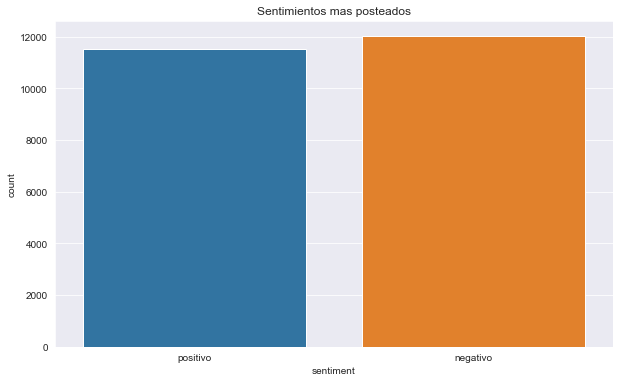

In [33]:

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Sentimientos mas posteados')
sns.countplot(df['sentiment']);

Otro comportamiento es que en el top 100 de los sentimientos positivos y negativos coinciden las siguientes palabras, las cuales probablemente quitemos de las oraciones para obtener mejores resultados

In [34]:
positivos=lista[0].index.tolist()
negativos=lista[1].index.tolist()
def listas(a, b):
    lista_final = []
    for i in a:
        if (i not in lista_final) and (i in b):
            lista_final.append(i)
    return lista_final

listas(positivos,negativos)

['happy',
 'mother',
 'thank',
 'today',
 'great',
 'think',
 'night',
 'really',
 'morning',
 'watch',
 'tomorrow',
 'tonight',
 'friend',
 'thing',
 'weekend',
 'right',
 'follow',
 'sleep',
 'movie',
 'start',
 'tweet',
 'little',
 'people',
 'school',
 'leave',
 'house']

Modelo 1 NB

In [35]:

def funcion_exportacion(df):
    
    def limpia_stop(x):
        lista=([list(my_stop_words) for x in my_stop_words])
        words = x.split(" ")
        words_final = []
        for w in words:
            if w not in lista[0]:
                words_final.append(w)
        return " ".join(words_final)
    
    df['content']=df['content'].str.replace('([^\s\w]|_)+', '')
    df['content']=df['content'].apply(lambda x : limpia_stop(x))
  
    nlp = spacy.load("en")
    lemma = []
    for doc in nlp.pipe(df['content'].astype('unicode').values, batch_size=50,
                            n_threads=-1):
        if doc.is_parsed:
            lemma.append([n.lemma_ for n in doc])
        else:
            lemma.append(None)
    df['content'] = lemma
    df['content'] = df['content'].apply(lambda x: ' '.join([y for y in x.split() if '@' not in y]))
    df['content'] = df['content'].apply(lambda x: ' '.join([y for y in x if y != '-PRON-']))
    return df



In [42]:
X = df['content']
y = np.where(df['sentiment']=='positivo',1,0)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.4, random_state=11238)

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

text_clf = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('clf', MultinomialNB(alpha=0.1))
    ])


In [44]:
text_clf.fit(X_train, y_train);

yhat = text_clf.predict(X_test)  

In [45]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, yhat)) 

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      4865
           1       0.70      0.66      0.68      4555

    accuracy                           0.70      9420
   macro avg       0.70      0.69      0.69      9420
weighted avg       0.70      0.70      0.69      9420



In [53]:
from sklearn.tree import DecisionTreeClassifier
text_clf3 = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('clf', DecisionTreeClassifier())
    ])
text_clf3.fit(X_train, y_train)
yhat = text_clf3.predict(X_test)  
print(classification_report(y_test, yhat)) 

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      4865
           1       0.66      0.63      0.65      4555

    accuracy                           0.66      9420
   macro avg       0.66      0.66      0.66      9420
weighted avg       0.66      0.66      0.66      9420



In [78]:
from sklearn.svm import SVC


text_clf4 = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('clf', SVC(kernel='rbf'))
    ])
text_clf4.fit(X_train, y_train)
yhat = text_clf4.predict(X_test)  
print(classification_report(y_test, yhat)) 

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      4865
           1       0.74      0.65      0.69      4555

    accuracy                           0.72      9420
   macro avg       0.72      0.72      0.72      9420
weighted avg       0.72      0.72      0.72      9420



In [79]:
from sklearn.svm import SVC

text_clf5 = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('clf', BernoulliNB())
    ])
text_clf5.fit(X_train, y_train)
yhat = text_clf5.predict(X_test)  
print(classification_report(y_test, yhat)) 

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      4865
           1       0.73      0.67      0.70      4555

    accuracy                           0.72      9420
   macro avg       0.72      0.72      0.72      9420
weighted avg       0.72      0.72      0.72      9420



In [81]:
from sklearn.ensemble import RandomForestClassifier
text_clf6 = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('clf', RandomForestClassifier(oob_score=True, random_state=11238))
    ])
text_clf6.fit(X_train, y_train)
yhat = text_clf6.predict(X_test)  
print(classification_report(y_test, yhat)) 

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      4865
           1       0.71      0.65      0.68      4555

    accuracy                           0.70      9420
   macro avg       0.71      0.70      0.70      9420
weighted avg       0.71      0.70      0.70      9420



In [82]:
text_clf7 = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('clf', SVC(kernel='linear'))
    ])
text_clf7.fit(X_train, y_train)
yhat = text_clf7.predict(X_test)  
print(classification_report(y_test, yhat)) 

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4865
           1       0.70      0.68      0.69      4555

    accuracy                           0.70      9420
   macro avg       0.70      0.70      0.70      9420
weighted avg       0.70      0.70      0.70      9420



______
### Modelo 2  Cambio Hiper parametros

In [ ]:
from sklearn.svm import SVC


In [ ]:
def funcion_exportacion(entrada):
    
    def limpia_stop(x):
        lista=([list(my_stop_words) for x in my_stop_words])
        words = x.split(" ")
        words_final = []
        for w in words:
            if w not in lista[0]:
                words_final.append(w)
        return " ".join(words_final)
    
    entrada=entrada.replace('([^\s\w]|_)+', '')
    entrada=limpia_stop(entrada)

In [72]:

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
text_clf2 = Pipeline([
    ('vect', CountVectorizer(preprocessor = myfuncion,lowercase=True)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB(alpha=0.1)),
])

Ejecutando el modelo sin preprocesar el dataframe (Creando un dataframe alternativo, nos da un pésimo resultado.
En este caso se puede inferir que la no limpieza correcta del dataframe afecta las predicción de los sentimientos)

In [73]:
print(classification_report(y_test, yhat)) 

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      4865
           1       0.66      0.63      0.65      4555

    accuracy                           0.66      9420
   macro avg       0.66      0.66      0.66      9420
weighted avg       0.66      0.66      0.66      9420



In [107]:
c = [ 1, 10]
gamma = [0.0000001, 0.01, 0.1]
parametros = {'C': c, 'gamma': gamma}
model = GridSearchCV(SVC(kernel = 'rbf'), param_grid = parametros, cv=3,verbose=10)

text_clf99 = Pipeline(
    [
        ('vect', CountVectorizer(    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False)),
        ('clf', model)
    ])

text_clf99.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=1, gamma=1e-07 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=1, gamma=1e-07, score=0.507, total=   8.2s
[CV] C=1, gamma=1e-07 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV] .................... C=1, gamma=1e-07, score=0.507, total=   8.0s
[CV] C=1, gamma=1e-07 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.2s remaining:    0.0s


[CV] .................... C=1, gamma=1e-07, score=0.506, total=   8.0s
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.2s remaining:    0.0s


[CV] ..................... C=1, gamma=0.01, score=0.697, total=   6.8s
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   31.0s remaining:    0.0s


[CV] ..................... C=1, gamma=0.01, score=0.697, total=   6.7s
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.8s remaining:    0.0s


[CV] ..................... C=1, gamma=0.01, score=0.701, total=   6.8s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   44.5s remaining:    0.0s


[CV] ...................... C=1, gamma=0.1, score=0.719, total=   7.4s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   52.0s remaining:    0.0s


[CV] ...................... C=1, gamma=0.1, score=0.725, total=   7.5s
[CV] C=1, gamma=0.1 ..................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   59.4s remaining:    0.0s


[CV] ...................... C=1, gamma=0.1, score=0.724, total=   7.5s
[CV] C=10, gamma=1e-07 ...............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV] ................... C=10, gamma=1e-07, score=0.507, total=   8.1s
[CV] C=10, gamma=1e-07 ...............................................
[CV] ................... C=10, gamma=1e-07, score=0.507, total=   8.0s
[CV] C=10, gamma=1e-07 ...............................................
[CV] ................... C=10, gamma=1e-07, score=0.506, total=   8.1s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.718, total=   7.0s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.723, total=   6.8s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.725, total=   7.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.708, total=  14.3s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  2.6min finished


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', 

In [104]:
text_clf99['clf'].best_params_

{'C': 1, 'gamma': 0.1}

In [ ]:
c = [ 1, 10]
gamma = [0.0000001, 0.01, 0.1]